Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


[*********************100%%**********************]  1 of 1 completed

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


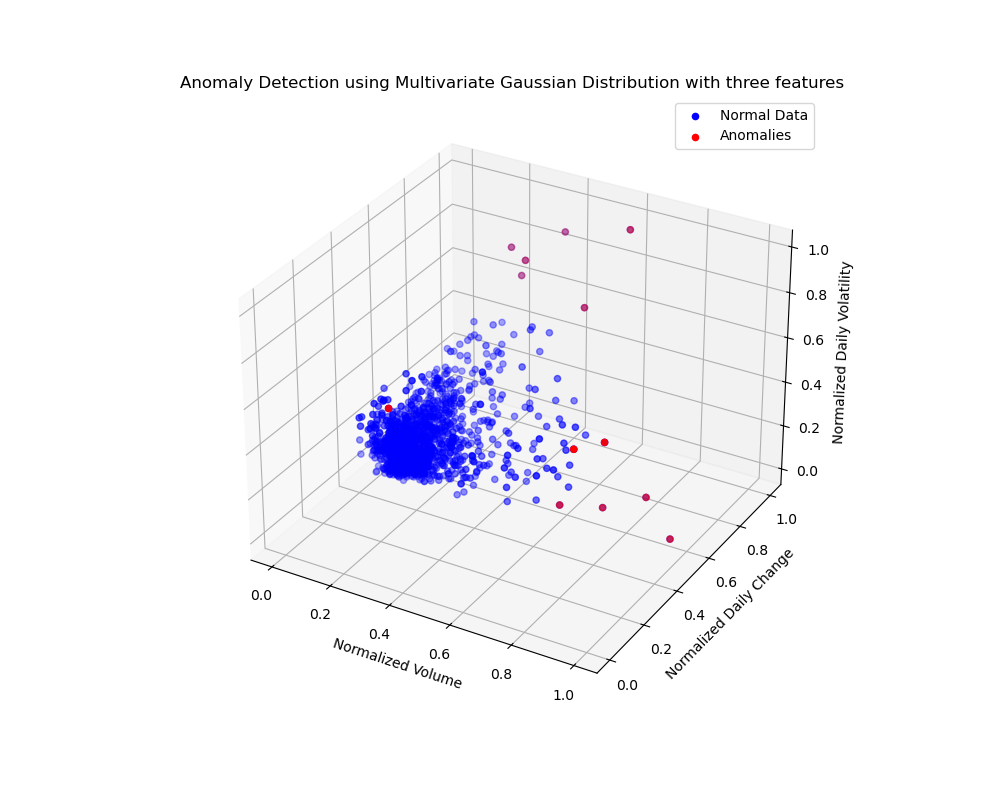

In [1]:
%matplotlib widget
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import multivariate_normal

def fetch_stock_data(ticker, start_date, end_date):
    data = yf.download(ticker, start=start_date, end=end_date)
    return data

def calculate_features(data):
    features = pd.DataFrame()
    features['volume'] = data['Volume']
    features['daily_change'] = data['Close'] - data['Open']
    features['daily_volatility'] = data['High'] - data['Low']
    return features

def min_max_normalize_data(data):
    min_max_scaled_data = (data - data.min()) / (data.max() - data.min())
    return min_max_scaled_data

def estimate_gaussian_params(data):
    mu = data.mean(axis=0)
    sigma = data.cov()
    return mu, sigma

def calculate_anomaly_scores(data, mu, sigma):
    p = multivariate_normal(mean=mu, cov=sigma)
    return p.pdf(data)

def find_anomalies(data, epsilon):
    return data < epsilon

def plot_3d_data_anomalies(data, anomalies):
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    
    ax.scatter(data[:, 0], data[:, 1], data[:, 2], c='blue', marker='o', label='Normal Data')
    ax.scatter(data[anomalies, 0], data[anomalies, 1], data[anomalies, 2], c='red', marker='o', label='Anomalies')

    ax.set_xlabel('Normalized Volume')
    ax.set_ylabel('Normalized Daily Change')
    ax.set_zlabel('Normalized Daily Volatility')
    ax.legend()
    plt.title('Anomaly Detection using Multivariate Gaussian Distribution with three features')
    plt.show()

if __name__ == "__main__":
    ticker = 'GOOGL'
    end_date = pd.Timestamp.today()
    start_date = end_date - pd.DateOffset(years=5)
    raw_data = fetch_stock_data(ticker, start_date, end_date)

    features = calculate_features(raw_data)
    normalized_features = min_max_normalize_data(features)
    data_vals = normalized_features.values

    mu, sigma = estimate_gaussian_params(normalized_features)
    p_vals = calculate_anomaly_scores(data_vals, mu, sigma)
    epsilon = np.percentile(p_vals, 1)
    anomalies = find_anomalies(p_vals, epsilon)
    
    plot_3d_data_anomalies(data_vals, anomalies)


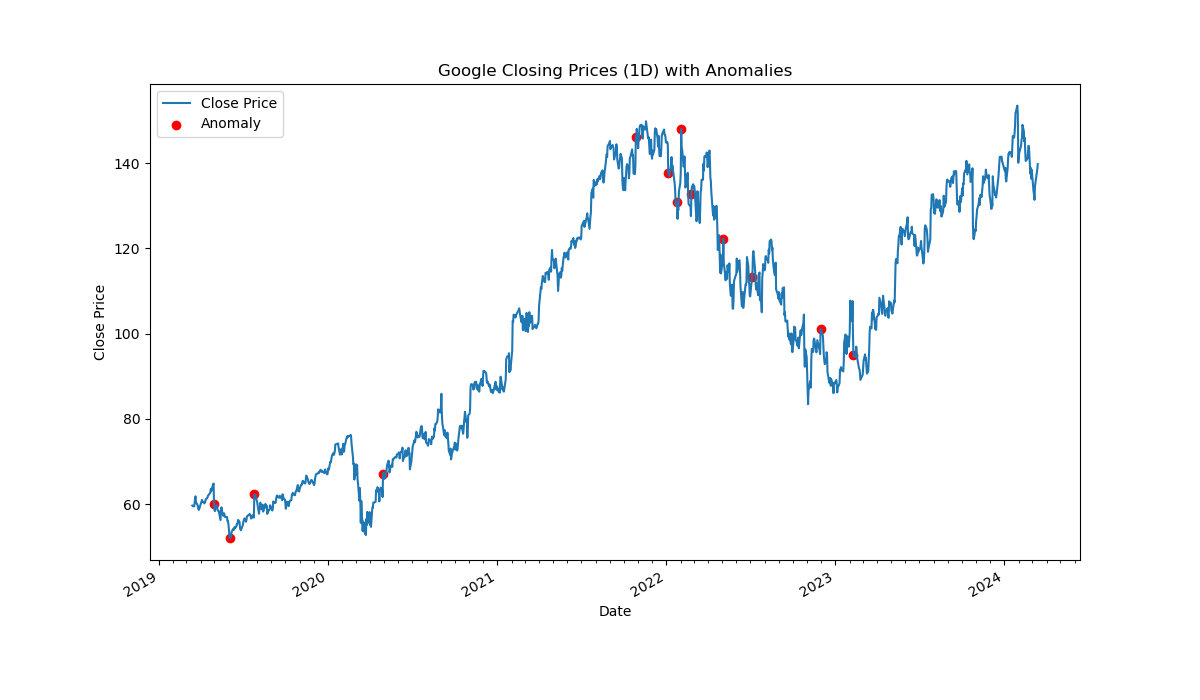

In [3]:
import matplotlib.dates as mdates

def plot_anomalies_on_price_chart(data, anomalies):
    fig, ax1 = plt.subplots(figsize=(12, 7))

    ax1.plot(data.index, data['Close'], label='Close Price')
    anomaly_dates = data.index[anomalies]
    ax1.scatter(anomaly_dates, data.loc[anomaly_dates, 'Close'], color='red', label='Anomaly')

    ax1.set_xlabel('Date')
    ax1.set_ylabel('Close Price')
    ax1.set_title('Google Closing Prices (1D) with Anomalies')
    ax1.legend()
    
    ax1.xaxis.set_major_locator(mdates.YearLocator())
    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    ax1.xaxis.set_minor_locator(mdates.MonthLocator())
    
    fig.autofmt_xdate()
    plt.show()

plot_anomalies_on_price_chart(raw_data, anomalies)
